In [87]:
from os import listdir
import numpy as np
import pylab
import re

In [2]:
s1 = 0.05 # sweeping allele fitness
s2 = 0.005 # focal allele fitness
m = 0.5 # migration rate
scale = np.sqrt(s1/m) # factor to convert number of lattice sites to dimensionless chis

In [88]:
dir_name='data'

In [97]:
def take_third(x):
    i = re.search("\d",x).start()+1
    return int(x[i:x.find('.')])

def get_names(c,dire): # get all the names of the files in a directory
    names=listdir(dire)
    names2=[]
    for x in names:
        i = re.search("\d",x).start()
        if x[i:i+len(c)]==c:
            names2.append(x)
    return names2

def read_file(file1): # read file 
    i=0
    pfix = 0
    while True:
        line=file1.readline().split()
        if not line:break
        if len(line)==1: 
            pfix+=float(line[0])
            i+=1
    pfix = pfix/i
    return pfix,np.sqrt(pfix*(1-pfix)/i)
    
def get_pfixs(r,string_data,s,z):
    filenames = get_names(r,string_data)
    filenames.sort(key=take_third)
    xs=[take_third(f) for f in filenames]
    chis = scale*np.array(xs)
    pfixs=[]
    pfix_stds=[]
    for filename in filenames:
        file1 = open(string_data+'/'+filename,'r')
        pfix,pfix_std=read_file(file1)
        pfixs.append(pfix)
        pfix_stds.append(2*z*pfix_std)
    return chis,np.array(pfixs)/(2*s),np.array(pfix_stds)/(2*s)


def error_plot(x,y,yer,style,xlabel,ylabel,label=None,title=None,scalex = 'linear',scaley='linear'): 
    pylab.errorbar(x,y,yerr=yer,fmt=style,label = label)
    pylab.xscale(scalex)
    pylab.yscale(scaley)
    pylab.tick_params(labelsize=13)
    if title:
        pylab.title(title,fontsize=20)
    pylab.ylabel(ylabel,fontsize=20)
    pylab.xlabel(xlabel,fontsize=20)

In [107]:
rs = [0.001,0.005,0.01,0.05,0.1]

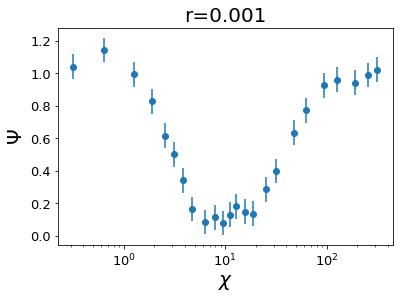

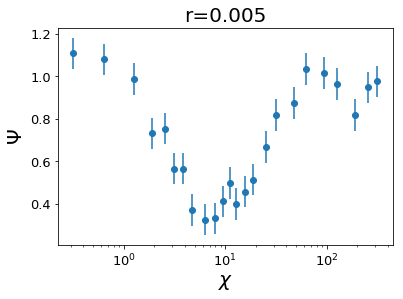

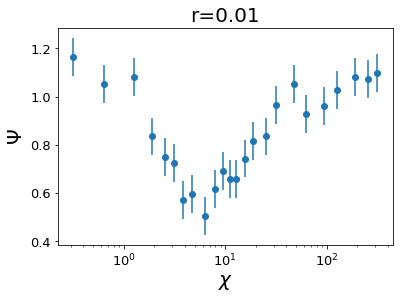

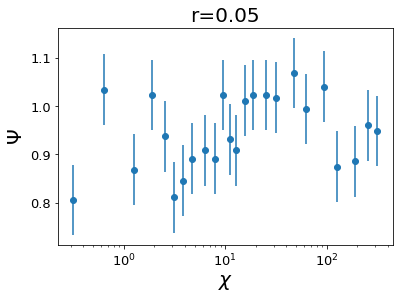

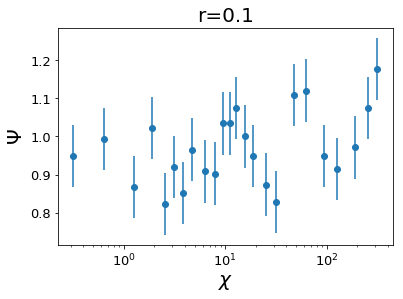

In [111]:
pfixess = []
pfix_stds=[]
for i,r in enumerate(rs):
    if i==0:
        chis,pfixes,pfix_std=get_pfixs(str(i),dir_name,s2,1.96)
    else:
        _,pfixes,pfix_std=get_pfixs(str(i),dir_name,s2,1.96)
    pfixess.append(pfixes)
    pfix_stds.append(pfix_std)
    error_plot(chis,pfixes,pfix_std,'o',"$\chi$","$\Psi$",title='r='+str(r),scalex = 'log')
    pylab.show()